In [1]:
import pandas as pd 
import numpy as np 

from match import Match
from vendors.tennisabstract.historical_match_stats import HistoricalMatchStats
from models import learnloop

import collect_meta_data

from models.probabilities import Probabilities
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
collect_meta_data.collect_player_ids()

[SUCCESS] ATP player IDs written to C:\dev\tennis/io/out/atp_player_ids.csv


In [2]:
m = Match(p1_lname = 'djokovic', p2_lname = 'medvedev', surface = 'hard', year = '2022')

<h1 style="color:teal">player stats</h1>

In [4]:
sr = m.build_serve_return_frame()
m.split_by_type()

In [5]:
m.sr_absolute.style.bar( color='lightgrey', axis=0).format('{:,.0f}')

,djokovic,medvedev
metric,,
Aces,140,486
Double Faults,34,184
Break Points Faced,54,240
Service Games Played,252,612
Break Points Opportunities,139,396
Return Games Played,240,606


In [6]:
m.sr_percent.multiply(100).style.bar( color='lightgrey', axis=0).format('{:,.0f}%')

,djokovic,medvedev
metric,,
1st Serve,67%,64%
1st Serve Points Won,81%,77%
2nd Serve Points Won,58%,52%
Break Points Saved,59%,68%
Service Games Won,91%,88%
Total Service Points Won,74%,68%
1st Serve Return Points Won,31%,32%
2nd Serve Return Points Won,56%,54%
Break Points Converted,45%,41%


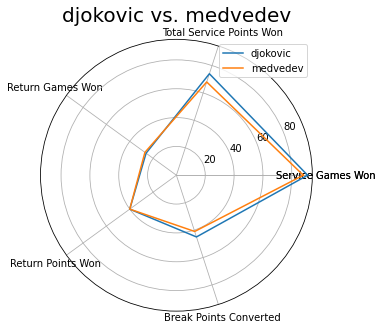

In [7]:
m.spider_plot(sr)

In [32]:
p1_records = m.build_win_loss_frame(m.p1_lname)
p1_records.style.bar( subset = ['ytd pct', 'career pct'], color='lightgrey', axis=0)\
    .format({
    'ytd pct': '{:,.0%}'.format,
    'career pct': '{:,.0%}'.format,
})
# .applymap(lambda x : 'background-color : lightgrey', subset = pd.IndexSlice[ :, "player"])\

djokovic


,ytd pct,career pct,titles,ytd wins,ytd losses,career wins,career losses
index,,,,,,,
Overall,86%,83%,91.000000,42,7,1031,206
Grand Slams,92%,88%,21.000000,11,1,334,47
ATP Masters 1000,79%,82%,38.000000,11,3,385,84
Tiebreaks,79%,65%,nan,19,5,293,158
Versus Top 10,79%,69%,nan,11,3,240,107
Finals,71%,70%,nan,5,2,90,39
Deciding Set (3rd or 5th Set),60%,72%,nan,6,4,200,76
5th Set Record,100%,79%,nan,1,0,37,10
Clay,78%,80%,18.000000,14,4,257,63


In [31]:
p2_records = m.build_win_loss_frame(m.p2_lname)
p2_records.style.bar( subset = ['ytd pct', 'career pct'], color='lightgrey', axis=0)\
    .format({
    'ytd pct': '{:,.0%}'.format,
    'career pct': '{:,.0%}'.format,
})

medvedev


,ytd pct,career pct,titles,ytd wins,ytd losses,career wins,career losses
index,,,,,,,
Overall,70%,69%,15.000000,45,19,267,118
Grand Slams,80%,73%,1.000000,12,3,57,21
ATP Masters 1000,58%,65%,4.000000,7,5,62,33
Tiebreaks,59%,58%,nan,17,12,82,59
Versus Top 10,27%,48%,nan,3,8,29,32
Finals,40%,56%,nan,2,3,15,12
Deciding Set (3rd or 5th Set),29%,57%,nan,4,10,63,48
5th Set Record,50%,27%,nan,1,1,3,8
Clay,60%,44%,0.000000,3,2,18,23


In [3]:
p1_activity, p2_activity = m.build_activity_frame()

In [4]:
print(m.p1_lname)
p1_activity.iloc[:20, :].style.apply(m.highlight_wins)

djokovic


,Round,Rank,Opponent,W-L,Score,tournament,sets,startdate,enddate,match_offset,matchdate
0,Finals,4.000000,Casper Ruud,W,75 63,"Nitto ATP Finals Turin, Italy 2022.11.14 - 2022.11.20",2,2022-11-14 00:00:00,2022-11-20 00:00:00,4,2022-11-18 00:00:00
1,Semi-Finals,9.000000,Taylor Fritz,W,765 766,"Nitto ATP Finals Turin, Italy 2022.11.14 - 2022.11.20",2,2022-11-14 00:00:00,2022-11-20 00:00:00,3,2022-11-17 00:00:00
2,Round Robin,5.000000,Daniil Medvedev,W,63 675 762,"Nitto ATP Finals Turin, Italy 2022.11.14 - 2022.11.20",3,2022-11-14 00:00:00,2022-11-20 00:00:00,2,2022-11-16 00:00:00
3,Round Robin,7.000000,Andrey Rublev,W,64 61,"Nitto ATP Finals Turin, Italy 2022.11.14 - 2022.11.20",2,2022-11-14 00:00:00,2022-11-20 00:00:00,1,2022-11-15 00:00:00
4,Round Robin,3.000000,Stefanos Tsitsipas,W,64 764,"Nitto ATP Finals Turin, Italy 2022.11.14 - 2022.11.20",2,2022-11-14 00:00:00,2022-11-20 00:00:00,0,2022-11-14 00:00:00
5,Finals,18.000000,Holger Rune,L,63 36 57,"ATP Masters 1000 Paris Paris, France 2022.10.31 - 2022.11.06",3,2022-10-31 00:00:00,2022-11-06 00:00:00,5,2022-11-05 00:00:00
6,Semi-Finals,5.000000,Stefanos Tsitsipas,W,62 36 764,"ATP Masters 1000 Paris Paris, France 2022.10.31 - 2022.11.06",3,2022-10-31 00:00:00,2022-11-06 00:00:00,4,2022-11-04 00:00:00
7,Quarter-Finals,23.000000,Lorenzo Musetti,W,60 63,"ATP Masters 1000 Paris Paris, France 2022.10.31 - 2022.11.06",2,2022-10-31 00:00:00,2022-11-06 00:00:00,3,2022-11-03 00:00:00
8,Round of 16,19.000000,Karen Khachanov,W,64 61,"ATP Masters 1000 Paris Paris, France 2022.10.31 - 2022.11.06",2,2022-10-31 00:00:00,2022-11-06 00:00:00,2,2022-11-02 00:00:00
9,Round of 32,34.000000,Maxime Cressy,W,761 64,"ATP Masters 1000 Paris Paris, France 2022.10.31 - 2022.11.06",2,2022-10-31 00:00:00,2022-11-06 00:00:00,1,2022-11-01 00:00:00


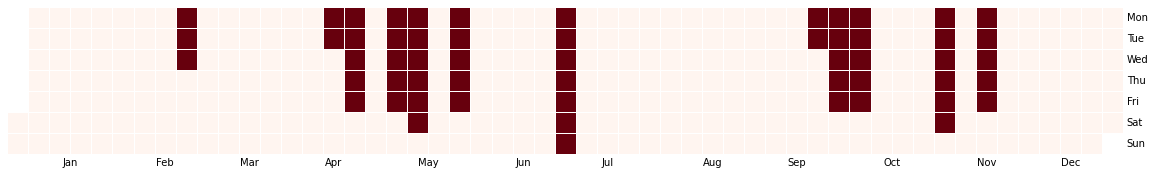

In [5]:
m.calendar_map(p1_activity[['matchdate', 'Opponent']])

In [6]:
print(m.p2_lname)
p2_activity.iloc[:20, :].style.apply(m.highlight_wins)

medvedev


,Round,Rank,Opponent,W-L,Score,tournament,sets,startdate,enddate,match_offset,matchdate
0,Round Robin,8.000000,Novak Djokovic,L,36 765 672,"Nitto ATP Finals Turin, Italy 2022.11.14 - 2022.11.20",3,2022-11-14 00:00:00,2022-11-20 00:00:00,2,2022-11-16 00:00:00
1,Round Robin,3.000000,Stefanos Tsitsipas,L,36 7611 671,"Nitto ATP Finals Turin, Italy 2022.11.14 - 2022.11.20",3,2022-11-14 00:00:00,2022-11-20 00:00:00,1,2022-11-15 00:00:00
2,Round Robin,7.000000,Andrey Rublev,L,767 36 677,"Nitto ATP Finals Turin, Italy 2022.11.14 - 2022.11.20",3,2022-11-14 00:00:00,2022-11-20 00:00:00,0,2022-11-14 00:00:00
3,Round of 32,25.000000,Alex de Minaur,L,46 62 57,"ATP Masters 1000 Paris Paris, France 2022.10.31 - 2022.11.06",3,2022-10-31 00:00:00,2022-11-06 00:00:00,1,2022-11-01 00:00:00
4,Round of 64,nan,Bye,nan,nan,"ATP Masters 1000 Paris Paris, France 2022.10.31 - 2022.11.06",1,2022-10-31 00:00:00,2022-11-06 00:00:00,0,2022-10-31 00:00:00
5,Finals,19.000000,Denis Shapovalov,W,46 63 62,"Vienna Vienna, Austria 2022.10.24 - 2022.10.30",3,2022-10-24 00:00:00,2022-10-30 00:00:00,4,2022-10-28 00:00:00
6,Semi-Finals,32.000000,Grigor Dimitrov,W,64 62,"Vienna Vienna, Austria 2022.10.24 - 2022.10.30",2,2022-10-24 00:00:00,2022-10-30 00:00:00,3,2022-10-27 00:00:00
7,Quarter-Finals,12.000000,Jannik Sinner,W,64 62,"Vienna Vienna, Austria 2022.10.24 - 2022.10.30",2,2022-10-24 00:00:00,2022-10-30 00:00:00,2,2022-10-26 00:00:00
8,Round of 16,113.000000,Dominic Thiem,W,63 63,"Vienna Vienna, Austria 2022.10.24 - 2022.10.30",2,2022-10-24 00:00:00,2022-10-30 00:00:00,1,2022-10-25 00:00:00
9,Round of 32,94.000000,Nikoloz Basilashvili,W,62 62,"Vienna Vienna, Austria 2022.10.24 - 2022.10.30",2,2022-10-24 00:00:00,2022-10-30 00:00:00,0,2022-10-24 00:00:00


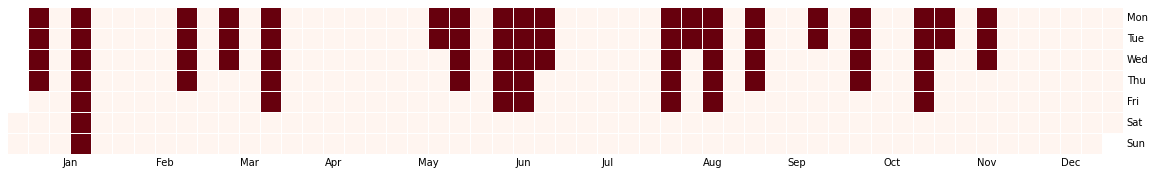

In [7]:
m.calendar_map(p2_activity[['matchdate', 'Opponent']])

In [14]:
hms = HistoricalMatchStats(fp = 'C:\\dev\\tennis\\io\\in\\atp_matches_2021.csv')

In [15]:
df = hms.player_match_rows()

In [16]:
df = df[[
'p1_result','p2_result',
'p1_hand', 'p1_rank','p1_ht', 'p1_ace','p1_svpt', 'p1_1stIn', 'p1_1stWon', 'p1_2ndWon', 'p1_SvGms', 'p1_bpSaved', 'p1_bpFaced', 
'p2_hand','p2_rank', 'p2_ht', 'p2_ace', 'p2_svpt', 'p2_1stIn', 'p2_1stWon', 'p2_2ndWon', 'p2_SvGms', 'p2_bpSaved', 'p2_bpFaced'
]]

In [17]:
df.transpose()

,0,1,2,3,4,5,...,2584,2585,2586,2587,2588,2589
p1_result,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,0.0,1.0,0.0,1.0
p2_result,1.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0
p1_hand,1.0,1.0,1.0,0.0,1.0,0.0,...,1.0,1.0,2.0,1.0,2.0,1.0
p1_rank,62.0,76.0,77.0,134.0,115.0,78.0,...,107.0,540.0,818.0,905.0,671.0,176.0
p1_ht,188.0,196.0,196.0,183.0,191.0,183.0,...,175.0,183.0,185.0,185.0,191.0,185.0
p1_ace,4.0,3.0,6.0,3.0,3.0,2.0,...,1.0,3.0,5.0,3.0,3.0,2.0
p1_svpt,64.0,44.0,134.0,86.0,66.0,53.0,...,44.0,109.0,85.0,52.0,97.0,41.0
p1_1stIn,40.0,27.0,80.0,63.0,39.0,37.0,...,28.0,61.0,48.0,29.0,50.0,27.0
p1_1stWon,27.0,11.0,56.0,33.0,31.0,19.0,...,24.0,41.0,36.0,22.0,34.0,23.0
p1_2ndWon,13.0,6.0,25.0,6.0,13.0,6.0,...,9.0,24.0,19.0,16.0,20.0,7.0


mask statisticaly insignificant correlation (p > 0.05)

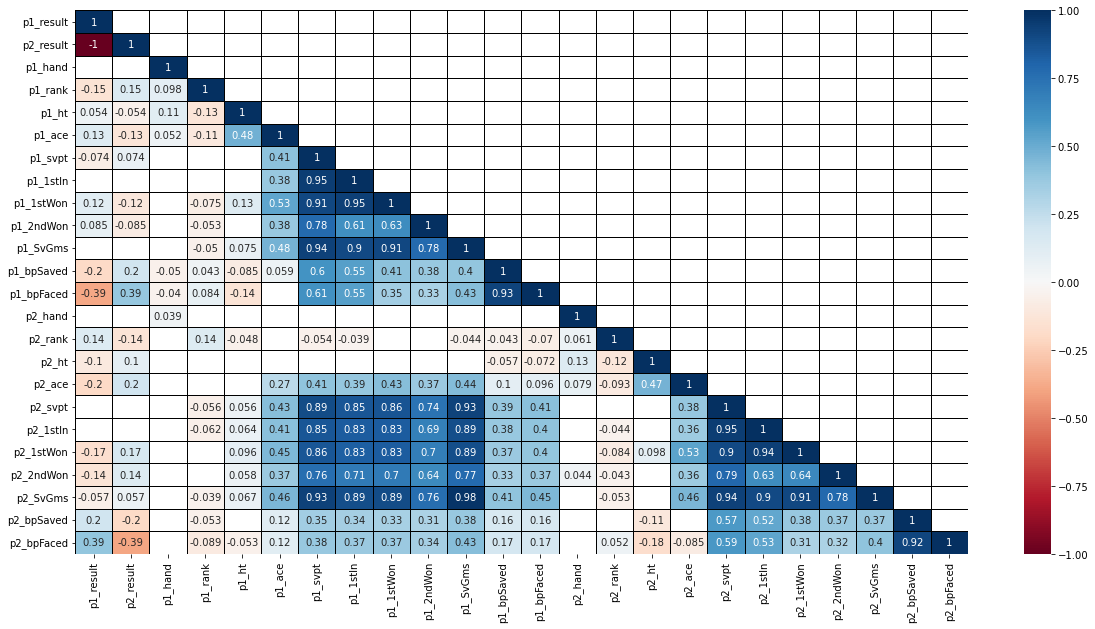

In [18]:
from scipy import stats

def corr_sig(df=None):
    p_matrix = np.zeros(shape=(df.shape[1],df.shape[1]))
    for col in df.columns:
        for col2 in df.drop(col,axis=1).columns:
            _ , p = stats.pearsonr(df[col],df[col2])
            p_matrix[df.columns.to_list().index(col),df.columns.to_list().index(col2)] = p
    return p_matrix

def plot_cor_matrix(corr, mask=None):
    f, ax = plt.subplots(figsize=(20, 10))
    sns.heatmap(corr, ax=ax,
                mask=mask,
                # cosmetics
                annot=True, vmin=-1, vmax=1, center=0,
                cmap='RdBu', linewidths=1, linecolor='black')
    
# Plotting with significance filter
corr = df.corr()                            # get correlation
p_values = corr_sig(df)                     # get p-Value
mask = np.invert(np.tril(p_values<0.05))    # mask - only get significant corr
plot_cor_matrix(corr,mask)  

In [19]:
learnloop.learn(df)

*** LogisticRegression() ***
Accuracy: 0.9588159588159588
Precision: 0.9554455445544554
Recall: 0.965
*** SVC(kernel='linear') ***
Accuracy: 0.9498069498069498
Precision: 0.9434889434889435
Recall: 0.96
*** KNeighborsClassifier(n_neighbors=3) ***
Accuracy: 0.6525096525096525
Precision: 0.6547619047619048
Recall: 0.6875
*** DecisionTreeClassifier() ***
Accuracy: 0.7940797940797941
Precision: 0.7985074626865671
Recall: 0.8025


In [20]:
# logistic regresion individual model and predictions
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import pydotplus
from sklearn import tree

In [21]:
df = df.dropna(how='any', axis=0)
dep_vars = ['p1_result','p2_result']
results = df[dep_vars]

features = [c for c in df.columns if c not in dep_vars]

X = df[features]     # independent variables  
y = df['p1_result']  # dependant variable

X_train, X_test, y_train, y_test = train_test_split(X, df.p1_result, test_size=0.3,random_state=11) 

In [22]:
clf = LogisticRegression().fit(X_train.values, y_train.values)

yhat = clf.predict(X_test.values)

print("Accuracy:",metrics.accuracy_score(y_test, yhat)) #  Model Accuracy: how often is the classifier correct?
print("Precision:",metrics.precision_score(y_test, yhat))  # Model Precision: what percentage of positive tuples are labeled as such?
print("Recall:",metrics.recall_score(y_test, yhat))


Accuracy: 0.9588159588159588
Precision: 0.9554455445544554
Recall: 0.965


In [23]:
test_row_num = 412

ypred = clf.predict(X_test.iloc[test_row_num].values.reshape(1, -1))
print(f'prediction for player 1: {ypred}')    

print('\n')

match_data = pd.DataFrame(X_test.iloc[test_row_num]).transpose()
print('actuals:')
print(match_data.transpose())

print('\n')
print(results.iloc[match_data.index.values[0]])


prediction for player 1: [1]


actuals:
             2482
p1_hand       1.0
p1_rank      32.0
p1_ht       193.0
p1_ace       11.0
p1_svpt      79.0
p1_1stIn     54.0
p1_1stWon    41.0
p1_2ndWon    14.0
p1_SvGms     13.0
p1_bpSaved    4.0
p1_bpFaced    5.0
p2_hand       1.0
p2_rank     195.0
p2_ht       201.0
p2_ace        3.0
p2_svpt      68.0
p2_1stIn     44.0
p2_1stWon    30.0
p2_2ndWon    13.0
p2_SvGms     13.0
p2_bpSaved    1.0
p2_bpFaced    4.0


p1_result    1
p2_result    0
Name: 2482, dtype: int64


In [24]:
prob = Probabilities()
ra = prob.expected_rank(atp_rank=1)
rb = prob.expected_rank(atp_rank=100)
ra, rb

(8.0, 3.394829814011908)

In [25]:
pa_match = prob.prob_win_at_match_start(Ra=ra, Rb=rb)
pa_match

0.5978476967222589

In [26]:
pa_game  = prob.prob_win_game(Pa=pa_match) 
pa_game

0.7312222744755827

In [27]:
point_probs = prob.win_point(ai=0.5, bi=0.5, ci=0.5, aav=0.5, di=0.5, ei=0.5)
point_probs

(0.5, 0.5)

In [1]:
# prob.prob_of_prop_occurance(mu=.7, k = 1, how=None)